# Human Activity Recognisation Dataset

## Project 9 -Group 2
### Members:
#### 1.  Anshula Awasthi
#### 2.  Aditi Jain
#### 3.  Meeti Dixit

## Problem statement 

In this project we will try to predict human activity (1-Walking, 2-Walking upstairs, 3-Walking downstairs, 4-Sitting, 5-Standing or 6-Laying) by using the smartphone’s sensors. Meaning that by using the following methods, the smartphone can detect what we are doing at the moment.
This data set is collected from recordings of 30 human subjects captured via smartphones
enabled with embedded inertial sensors. This is a multi-classification problem. The data set
has 10,299 rows and 561 columns. 

## Applications and Potential Use

1. Daily Life Monitoring:  Applications in Daily Life Monitoring aim to provide reference for activity logging and monitor exercise and healthy lifestyle practises. Various Smartphone applications with activity recognition techniques have already shown up and specialised devices such as fitbit etc are also popularised.


2. Elderly and Youth Care: These applications can be used to prevent harm and for safety purposes. It can be used to monitor infant sleep patterns and ASD (autistic spectrum disorder) detection also using activity recognition techniques.


3. Personal Biometric Signature: Motion patterns of an individual are usually exclusive and unique. Sensors such as accelerometers can capture those differences. The activity recognition techniques provide a possible solution for human biometric signature with patterns in gestures.

## Step By Step Approach Analysis

1. Importing data and Elementary Data Analysis
2. Feature selection and engineering using PCA
3. Application of various ML algorithms and performance evaluation using accuracy and confusion matrices.
4. Selection of the best algorithm and removing overfitting if necessary
5. Fine tuning and deploying it for test data 

## Algorithm used

1. Logistic Regression
2. Random Forest Classifier
3. Gaussian NB
4. KNeighbors Classifier
5. SVC
6. Decision Tree Classifier

## Packages Used

1. Pandas for importing and handling data.
2. Matplotlib for plotting graphs and other plots used in analysis.
3. Numpy for multi-dimensional array and matrix processing 
4. Scikit Learn for a range of algorithms, including clustering, factor analysis, principal component analysis etc.

### 1.  Import Required Libraries 

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
features = list()
with open("data/Features.txt") as f:
    for line in f:
        features.append(line.split()[1])  
len(features)        

561

In [54]:
labels = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "STANDING",
    "LAYING"
]

In [55]:
train_df = pd.read_csv("data/train/X_train.txt", delim_whitespace = True, names = features)

train_df["subject_id"] = pd.read_csv("data/train/subject_train.txt", header = None)

train_df["activity"] = pd.read_csv("data/train/y_train.txt", header = None)
label_name = train_df["activity"].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
train_df["activity"] = label_name

train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [56]:
test_df = pd.read_csv("data/test/X_test.txt", delim_whitespace = True, names = features)

test_df["subject_id"] = pd.read_csv("data/test/subject_test.txt", header = None)

test_df["activity"] = pd.read_csv("data/test/y_test.txt", header = None)
label_name = test_df["activity"].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
test_df["activity"] = label_name

test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [57]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity
0,0.154443,0.017598,-0.035596,0.159955,-0.055076,0.336801,0.059025,-0.135702,0.284999,0.547155,...,-0.764037,0.655397,-0.556345,-0.776320,-0.928344,-0.662105,0.172764,0.248161,7,WALKING_DOWNSTAIRS
1,0.277732,-0.016141,-0.109133,-0.991653,-0.996749,-0.994072,-0.992042,-0.996898,-0.994302,-0.939731,...,-0.771389,-0.134506,-0.515110,0.151089,-0.190990,0.512200,-0.390469,-0.616401,30,LYING
2,0.293261,-0.023525,-0.032613,-0.372487,-0.423219,-0.101452,-0.369648,-0.463183,-0.112522,-0.329410,...,-0.173804,0.045868,-0.653364,-0.253606,0.495939,-0.791810,0.018790,0.145608,16,WALKING
3,0.326108,-0.014069,-0.090487,-0.287190,0.043383,-0.562621,-0.338449,0.053546,-0.564563,-0.130747,...,-0.831837,-0.609287,-0.240878,0.210233,-0.692126,-0.824675,0.219301,0.014311,6,WALKING
4,0.273740,-0.018106,-0.098278,-0.989689,-0.956948,-0.941875,-0.992179,-0.957153,-0.951296,-0.920324,...,-0.383121,0.032689,0.206609,-0.222881,0.458749,-0.653823,-0.084165,-0.144478,6,SITTING


In [58]:
print(train_df.shape)
print(test_df.shape)

(7352, 563)
(2947, 563)


### 2. EDA

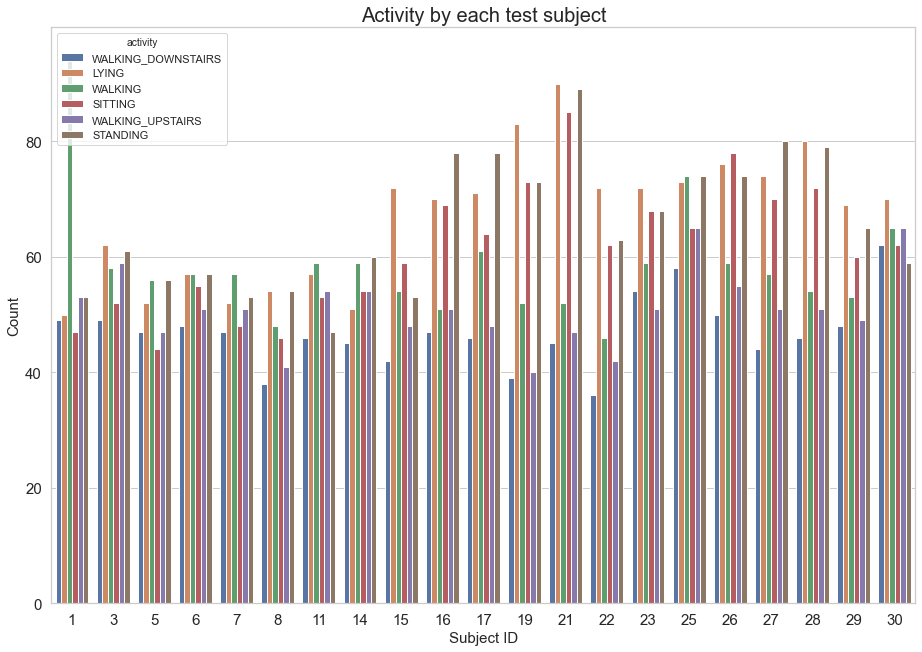

In [59]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 20)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject_id", hue = "activity", data = train_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

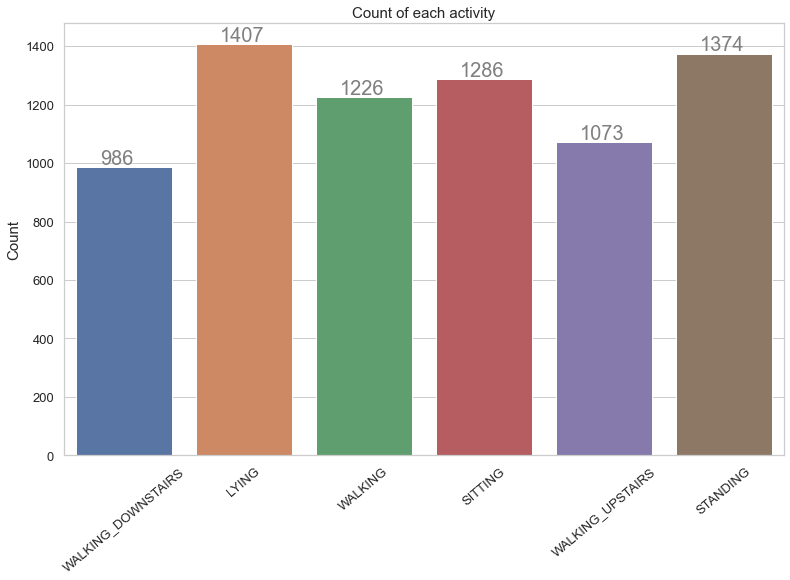

In [60]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity", data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

<Figure size 720x720 with 0 Axes>

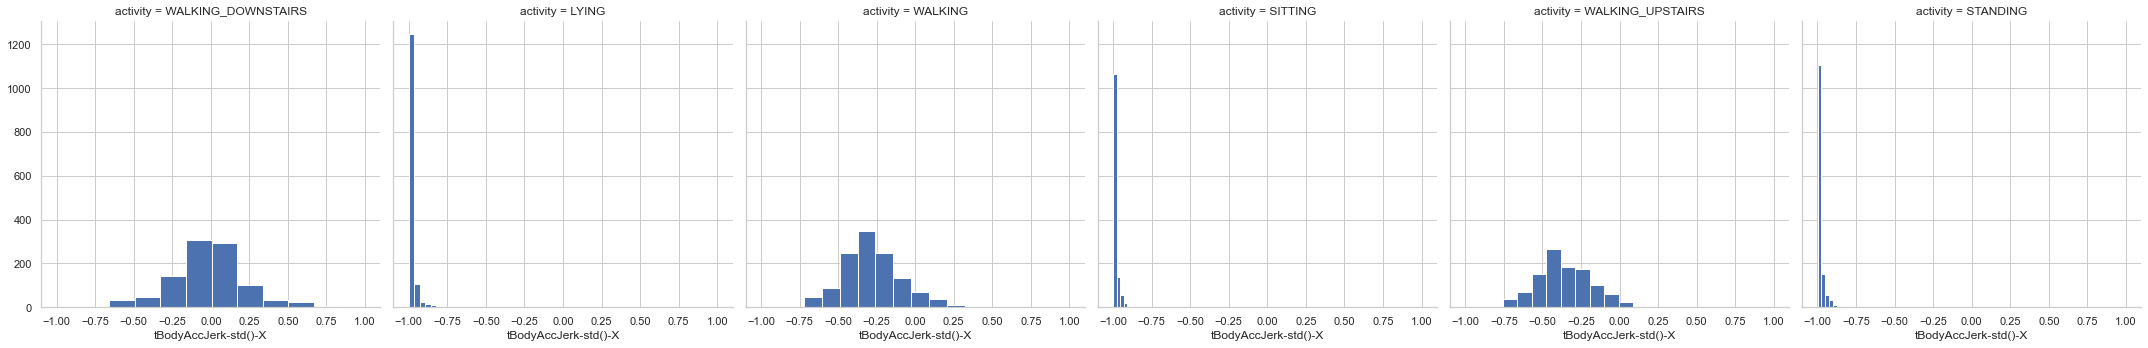

In [61]:
fig= plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
g = sns.FacetGrid(train_df,col='activity',height=5)
g.map(plt.hist,'tBodyAccJerk-std()-X')

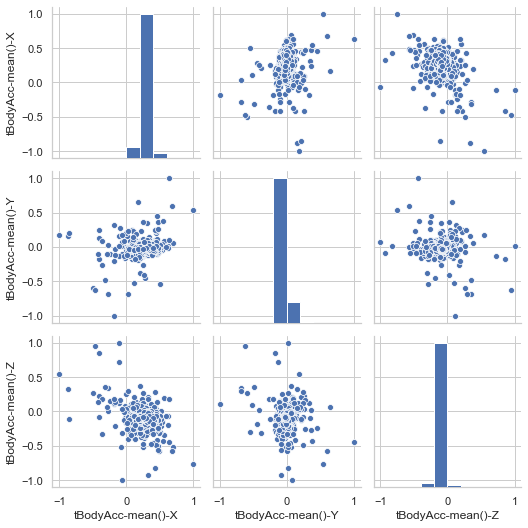

In [62]:
sns.set(style='whitegrid',context='notebook')
cols=['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z']

sns.pairplot(train_df[cols],size=2.5)
plt.tight_layout()
plt.show()

In [63]:
pivoted=train_df.pivot_table(index='subject_id',columns='activity',aggfunc='count').iloc[:,:6]

count_df=pd.DataFrame(pivoted.to_records())
count_df=count_df.set_index('subject_id')
count_df.columns=['LAYING','SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
count_df

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject_id,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


In [64]:
duration_df=count_df*2.5
duration_df

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject_id,,,,,,
1,125.0,117.5,132.5,237.5,122.5,132.5
3,155.0,130.0,152.5,145.0,122.5,147.5
5,130.0,110.0,140.0,140.0,117.5,117.5
6,142.5,137.5,142.5,142.5,120.0,127.5
7,130.0,120.0,132.5,142.5,117.5,127.5
8,135.0,115.0,135.0,120.0,95.0,102.5
11,142.5,132.5,117.5,147.5,115.0,135.0
14,127.5,135.0,150.0,147.5,112.5,135.0
15,180.0,147.5,132.5,135.0,105.0,120.0


In [65]:
duration_df['ACTIVE']=duration_df['WALKING']+duration_df['WALKING_DOWNSTAIRS']+duration_df['WALKING_UPSTAIRS']
duration_df['PASSIVE']=duration_df['LAYING']+duration_df['SITTING']+duration_df['STANDING']
duration_df

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,ACTIVE,PASSIVE
subject_id,,,,,,,,
1,125.0,117.5,132.5,237.5,122.5,132.5,492.5,375.0
3,155.0,130.0,152.5,145.0,122.5,147.5,415.0,437.5
5,130.0,110.0,140.0,140.0,117.5,117.5,375.0,380.0
6,142.5,137.5,142.5,142.5,120.0,127.5,390.0,422.5
7,130.0,120.0,132.5,142.5,117.5,127.5,387.5,382.5
8,135.0,115.0,135.0,120.0,95.0,102.5,317.5,385.0
11,142.5,132.5,117.5,147.5,115.0,135.0,397.5,392.5
14,127.5,135.0,150.0,147.5,112.5,135.0,395.0,412.5
15,180.0,147.5,132.5,135.0,105.0,120.0,360.0,460.0


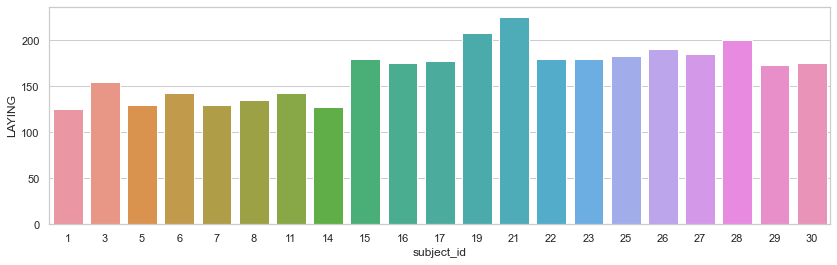

In [66]:
plt.figure(figsize=(14,4))
sns.barplot(x=duration_df.index,y=duration_df.LAYING)

Observation: Person 1 and 14 sleep very less.

The missing persons in x-axis are present in test data

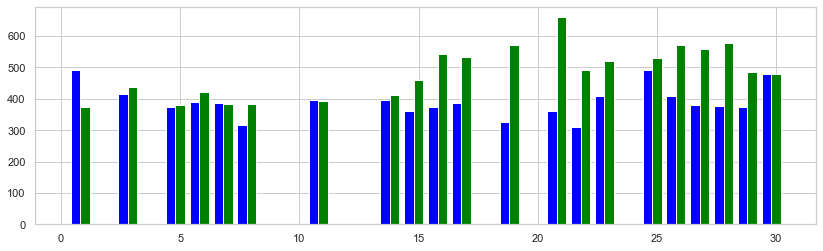

In [67]:
x=duration_df.index
plt.figure(figsize=(14,4))
ax=plt.subplot(111)
ax.bar(x-0.4,duration_df.ACTIVE,width=0.4,color='blue',align='center')
ax.bar(x,duration_df.PASSIVE,width=0.4,color='green',align='center')
plt.show()

Observation: Person 19 and 20 are highly inactive

### 3. Feature Selection and Dimentionality Reduction

In [68]:
X_train = train_df.iloc[:,:-1].values
y_train = train_df.iloc[:,-1].values
X_test = test_df.iloc[:,:-1].values
y_test = test_df.iloc[:,-1].values
X_train.shape

(7352, 562)

In [69]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
XTR = pd.DataFrame(X_train.T)
XTE = pd.DataFrame(X_test.T)
#XT.duplicated()

unique_features = [not i for i in XTR.duplicated()]
X_train = XTR[unique_features].T
X_test = XTE[unique_features].T
X_train.shape

(7352, 541)

In [71]:
df = pd.concat([train_df,test_df])

In [72]:
df.columns
import re
pattern = r'[()-.,]+'

tempcol = []
col_new = []
for col in train_df.columns:
  new_string = re.sub(pattern, '_', col) 
  col_new.append(new_string)
  tempcol.append(new_string.split('_')[0])
  
df.columns = col_new

print('The main columns are:')
for temp in list(set(tempcol)):
    print(temp)


The main columns are:
fBodyBodyAccJerkMag
tGravityAcc
tBodyGyro
fBodyBodyGyroMag
fBodyAccMag
tBodyGyroJerkMag
fBodyAccJerk
tBodyAccJerk
fBodyBodyGyroJerkMag
tBodyAccJerkMag
tBodyGyroJerk
tBodyGyroMag
tBodyAcc
fBodyGyro
activity
tBodyAccMag
subject
angle
fBodyAcc
tGravityAccMag


In [73]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["WALKING", "LAYING", "STANDING", "SITTING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS"])
df['activity'] = le.fit_transform(df['activity'])
df_en = df.drop(columns=['subject_id']) #dropping unwanted columns
df_en_data = df_en.drop(columns = ['activity'])
df_en_target = df_en['activity']
df_en_target.value_counts()

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: activity, dtype: int64

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: activity, dtype: int64


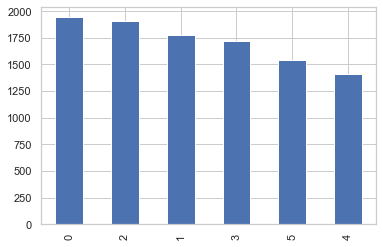

In [74]:
print(df.activity.value_counts())
df.activity.value_counts().plot.bar()

In [75]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()
df_robust = robustscaler.fit_transform(df_en_data)
df_robust

array([[-4.77004971,  2.43451003,  3.11572593, ...,  0.18096574,
        -0.03726233,  1.07320864],
       [ 0.02169345,  0.0714663 , -0.02291424, ...,  4.15109947,
        -2.30252335, -2.60812815],
       [ 0.62524471, -0.44568218,  3.24304276, ..., -0.25754715,
        -0.65652781,  0.63653066],
       ...,
       [-0.59318765, -0.1256632 ,  0.15232143, ...,  3.92448554,
        -2.75455646, -2.06464737],
       [-0.33655468, -1.3480461 , -0.4818521 , ...,  0.09008063,
         0.276047  ,  0.75461884],
       [-0.10312743,  0.6542402 , -0.8776103 , ...,  1.35768046,
         0.50907119,  1.90730005]])

In [76]:
print('Covariance matrix \n')
df_en_cov_mat= np.cov(df_robust, rowvar=False)
df_en_cov_mat
df_en_cov_mat = np.cov(df_robust.T)
eig_vals, eig_vecs = np.linalg.eig(df_en_cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
tot = sum(eig_vals)
print("\n",tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n\n1. Variance Explained\n",var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
print("\n\n3. Percentage of variance the first 200 principal components each contain\n ",var_exp[0:150])
print("\n\n4. Percentage of variance the first 200 principal components together contain\n",sum(var_exp[0:150]))

Covariance matrix 

Eigenvectors 
[[ 1.65370310e-03+0.00000000e+00j  9.11831195e-03+0.00000000e+00j
   6.24951980e-02+0.00000000e+00j ... -1.42188769e-23+0.00000000e+00j
  -7.03837053e-25-1.92005861e-23j -7.03837053e-25+1.92005861e-23j]
 [-5.20909421e-03+0.00000000e+00j -2.00503790e-03+0.00000000e+00j
   7.84875359e-03+0.00000000e+00j ...  4.09245533e-18+0.00000000e+00j
   1.30811775e-18+9.83913344e-19j  1.30811775e-18-9.83913344e-19j]
 [-3.50964412e-03+0.00000000e+00j -5.44517341e-03+0.00000000e+00j
  -1.34946892e-02+0.00000000e+00j ...  1.26931386e-18+0.00000000e+00j
   1.66315414e-18+1.18923865e-18j  1.66315414e-18-1.18923865e-18j]
 ...
 [-3.98811780e-02+0.00000000e+00j -1.67908300e-01+0.00000000e+00j
  -1.16401353e-01+0.00000000e+00j ... -1.78664413e-17+0.00000000e+00j
  -1.81286659e-17-3.09588857e-18j -1.81286659e-17+3.09588857e-18j]
 [ 3.25596826e-02+0.00000000e+00j  9.74638477e-02+0.00000000e+00j
   5.33550579e-02+0.00000000e+00j ...  5.24678014e-18+0.00000000e+00j
  -4.31851262

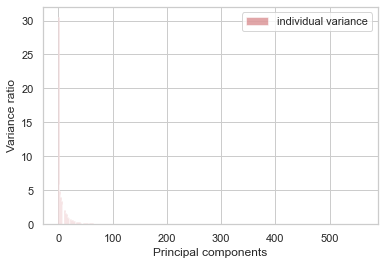

In [77]:
plt.bar(range(561), var_exp,alpha=0.5,align='center', label='individual variance',color='r')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

Text(0.5, 0, 'Principal components')

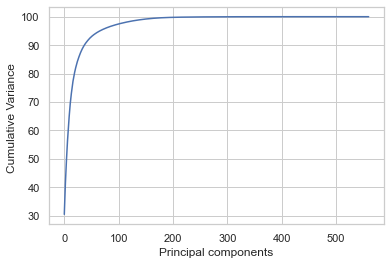

In [78]:
plt.plot(cum_var_exp)
plt.ylabel('Cumulative Variance ')
plt.xlabel('Principal components')

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
principalComponents = pca.fit_transform(df_robust)
df_pca = pd.DataFrame(data = principalComponents)
df_pca.shape

(10299, 144)

In [80]:
X = df_pca
Y = df_en_target
results = []

### 5.Comparision of various Classification Models
Here, we employed six classification techniques (supervised learning models) -- Logistic Regression, KNN, Random Forest, GaussianNB, SVC, Decision Tree. Same datasets are utilized to evaluate the accuracies fairly. We used cross validation technique to calculate the accuracies and further compared them, thus importing cross_val_score. The k-fold approach is used for the performance measure which divides the sample into k groups called folds. The accuracies are calculated for 5 groups i.e. 5 splits and their mean is further calculated. In the end, the mean is compared to select the best classification model.

In [81]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=40, shuffle=True)

### Logistic Regression
This classifier measures the relationship between the categorical dependent variable and one or more independent variables for a given dataset. The dependent variable is the target class, we are going to predict. However, the independent variables are the attributes or contextual features, we are going to use to predict the target class.

In [82]:
#LogisticRegression
accuracies = cross_val_score(estimator=LogisticRegression(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.9684466  0.96990291 0.97184466 0.97475728 0.96600291]
Mean Accuracy:-  0.9701908740693239


### Random Forest Classifier
It generates a number of decision trees rather than a single decision tree. By generating multiple decision trees for a given dataset, it reduces the over-fitting problem caused in the single decision tree. In this scenario, the number of trees we considered are 100.

In [83]:
#RandomForestClassifier
accuracies = cross_val_score(estimator=RandomForestClassifier(n_estimators=100), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.91796117 0.92718447 0.92135922 0.91359223 0.91792132]
Mean Accuracy:-  0.9196036816816534


### GaussianNB
This classifier easily calculates the probability to classify or predict the class in a given dataset.

In [84]:
#GaussianNB
accuracies = cross_val_score(estimator=GaussianNB(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.72475728 0.71067961 0.70436893 0.71990291 0.71296746]
Mean Accuracy:-  0.7145352395592167


### KNN
It takes into account local approximation and all the computation is deferred until classification. The K most comparable occasions are controlled via seeking through the whole preparing set for another test information point.

In [85]:
#KNN
accuracies = cross_val_score(estimator=KNeighborsClassifier(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.88786408 0.8961165  0.89757282 0.90048544 0.89460903]
Mean Accuracy:-  0.8953295736925739


### SVC
It fits the data provided, returning a "best fit" hyperplane that divides, or categorizes, your data. 

In [86]:
#SVC
accuracies = cross_val_score(estimator=SVC(probability=True), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.94660194 0.95194175 0.94902913 0.95145631 0.95240408]
Mean Accuracy:-  0.9502866411727815


### Decision Tree
It predicts the value of the target variable by inferring from the data features.

In [87]:
#DecisionTreeClassifier
accuracies = cross_val_score(estimator=DecisionTreeClassifier(), X=X, y=Y, cv=kfold)
results.append(accuracies.mean())
print(accuracies)
print("Mean Accuracy:- ",accuracies.mean())

[0.79902913 0.78446602 0.78932039 0.77281553 0.81204468]
Mean Accuracy:-  0.791535149969115


In [88]:
models = [
    'LogisticRegression',
    'RandomForestClassifier',
    'GaussianNB',
    'KNeighborsClassifier',
    'SVC',
    'DecisionTreeClassifier'
    ]

results = [i*100 for i in results]

### Performance Evaluation
The accuracies computed above are grouped for better comparison of the models' accuracies. The mean of the accuracy is grouped in 'results' and written across each model. Also, it is represented in graphs below.

In [89]:
data = {
    'Algorithm':models,
    'Accuracy': results
}

df = pd.DataFrame(data, columns = ['Algorithm', 'Accuracy'])
df.sort_values(inplace=True, by = ['Accuracy'], ascending = False)
df

,Algorithm,Accuracy
0,LogisticRegression,97.019087
4,SVC,95.028664
1,RandomForestClassifier,91.960368
3,KNeighborsClassifier,89.532957
5,DecisionTreeClassifier,79.153515
2,GaussianNB,71.453524


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

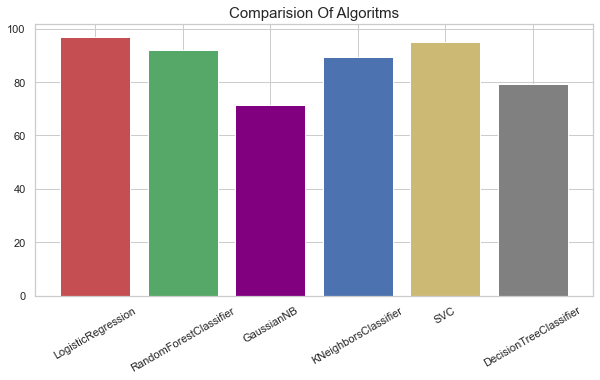

In [90]:
plt.figure(figsize=(10,5))
plt.title('Comparision Of Algoritms',fontsize=15)
plt.bar(models,results,color=['r','g','purple','b','y','grey'])
plt.xticks(rotation = 30)

### From these results, it would suggest logistic regression is worthy of further study on this problem.

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4, random_state=42)

### The following code computes the accuracy based on confusion matrix of the classification method.

In [92]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[789   0   0   0   0   0]
 [  1 650  47   0   0   1]
 [  0  58 703   0   0   0]
 [  0   0   0 674   9   5]
 [  0   0   0   5 566   8]
 [  0   0   0   5   4 595]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       0.92      0.93      0.92       699
           2       0.94      0.92      0.93       761
           3       0.99      0.98      0.98       688
           4       0.98      0.98      0.98       579
           5       0.98      0.99      0.98       604

    accuracy                           0.97      4120
   macro avg       0.97      0.97      0.97      4120
weighted avg       0.97      0.97      0.97      4120

0.9652912621359223


### 6.HyperTuning of Parameters

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 1, 100]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [95]:
# Create grid search using 5-fold cross validation
grid = GridSearchCV(clf, hyperparameters, cv=5, verbose=1, n_jobs=-1)

In [96]:
# Fit grid search
best_model = grid.fit(X, Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   22.9s finished


In [97]:
# View best hyperparameters
print('Best Penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best C:', grid.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1


In [98]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
final_model = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[789   0   0   0   0   0]
 [  1 650  47   0   0   1]
 [  0  58 703   0   0   0]
 [  0   0   0 674   9   5]
 [  0   0   0   5 566   8]
 [  0   0   0   5   4 595]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       0.92      0.93      0.92       699
           2       0.94      0.92      0.93       761
           3       0.99      0.98      0.98       688
           4       0.98      0.98      0.98       579
           5       0.98      0.99      0.98       604

    accuracy                           0.97      4120
   macro avg       0.97      0.97      0.97      4120
weighted avg       0.97      0.97      0.97      4120



0.9652912621359223